In [2]:
pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

sim = AerSimulator()

In [12]:
def run_and_display(qc, title="Circuit"):
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    print(f"\n🧪 {title}")
    print(qc.draw())
    print(f"Measurement Counts: {counts}")
    plot_histogram(counts, title=title)
    plt.show()
    return counts



qc_original = QuantumCircuit(2, 2)
qc_original.h(0)
qc_original.cx(0, 1)
qc_original.cz(0, 1)
qc_original.swap(0, 1)
qc_original.measure_all()

counts_original = run_and_display(qc_original, "🔸 Original Circuit: H(0) → CNOT(0→1) → CZ(0→1) → SWAP")


🧪 🔸 Original Circuit: H(0) → CNOT(0→1) → CZ(0→1) → SWAP
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        └───┘┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──X──░──╫─┤M├
             └───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts: {'11 00': 524, '00 00': 500}


# **1. Control/Target Variation**

In [13]:
qc_variation = QuantumCircuit(2, 2)
qc_variation.h(0)
qc_variation.cx(1, 0)
qc_variation.cz(1, 0)
qc_variation.swap(0, 1)
qc_variation.measure_all()

counts_variation = run_and_display(qc_variation, "1️⃣ Control/Target Variation: CNOT(1→0) CZ(1→0)")


🧪 1️⃣ Control/Target Variation: CNOT(1→0) CZ(1→0)
        ┌───┐┌───┐       ░ ┌─┐   
   q_0: ┤ H ├┤ X ├─■──X──░─┤M├───
        └───┘└─┬─┘ │  │  ░ └╥┘┌─┐
   q_1: ───────■───■──X──░──╫─┤M├
                         ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts: {'00 00': 532, '10 00': 492}


# **2. Gate Removal**

In [14]:
qc_no_swap = QuantumCircuit(2, 2)
qc_no_swap.h(0)
qc_no_swap.cx(0, 1)
qc_no_swap.cz(0, 1)
# No SWAP
qc_no_swap.measure_all()

counts_no_swap = run_and_display(qc_no_swap, "2️⃣ Gate Removal: SWAP removed")


🧪 2️⃣ Gate Removal: SWAP removed
        ┌───┐         ░ ┌─┐   
   q_0: ┤ H ├──■───■──░─┤M├───
        └───┘┌─┴─┐ │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──░──╫─┤M├
             └───┘    ░  ║ └╥┘
   c: 2/═════════════════╬══╬═
                         ║  ║ 
meas: 2/═════════════════╩══╩═
                         0  1 
Measurement Counts: {'11 00': 533, '00 00': 491}


# **3. Add Another Hadamard**

In [15]:
qc_add_h = QuantumCircuit(2, 2)
qc_add_h.h(0)
qc_add_h.h(1)
qc_add_h.cx(0, 1)
qc_add_h.cz(0, 1)
qc_add_h.swap(0, 1)
qc_add_h.measure_all()

counts_add_h = run_and_display(qc_add_h, "3️⃣ Added Hadamard on Qubit 1 before CNOT")


🧪 3️⃣ Added Hadamard on Qubit 1 before CNOT
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        ├───┤┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■──X──░──╫─┤M├
        └───┘└───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts: {'01 00': 245, '00 00': 247, '11 00': 262, '10 00': 270}


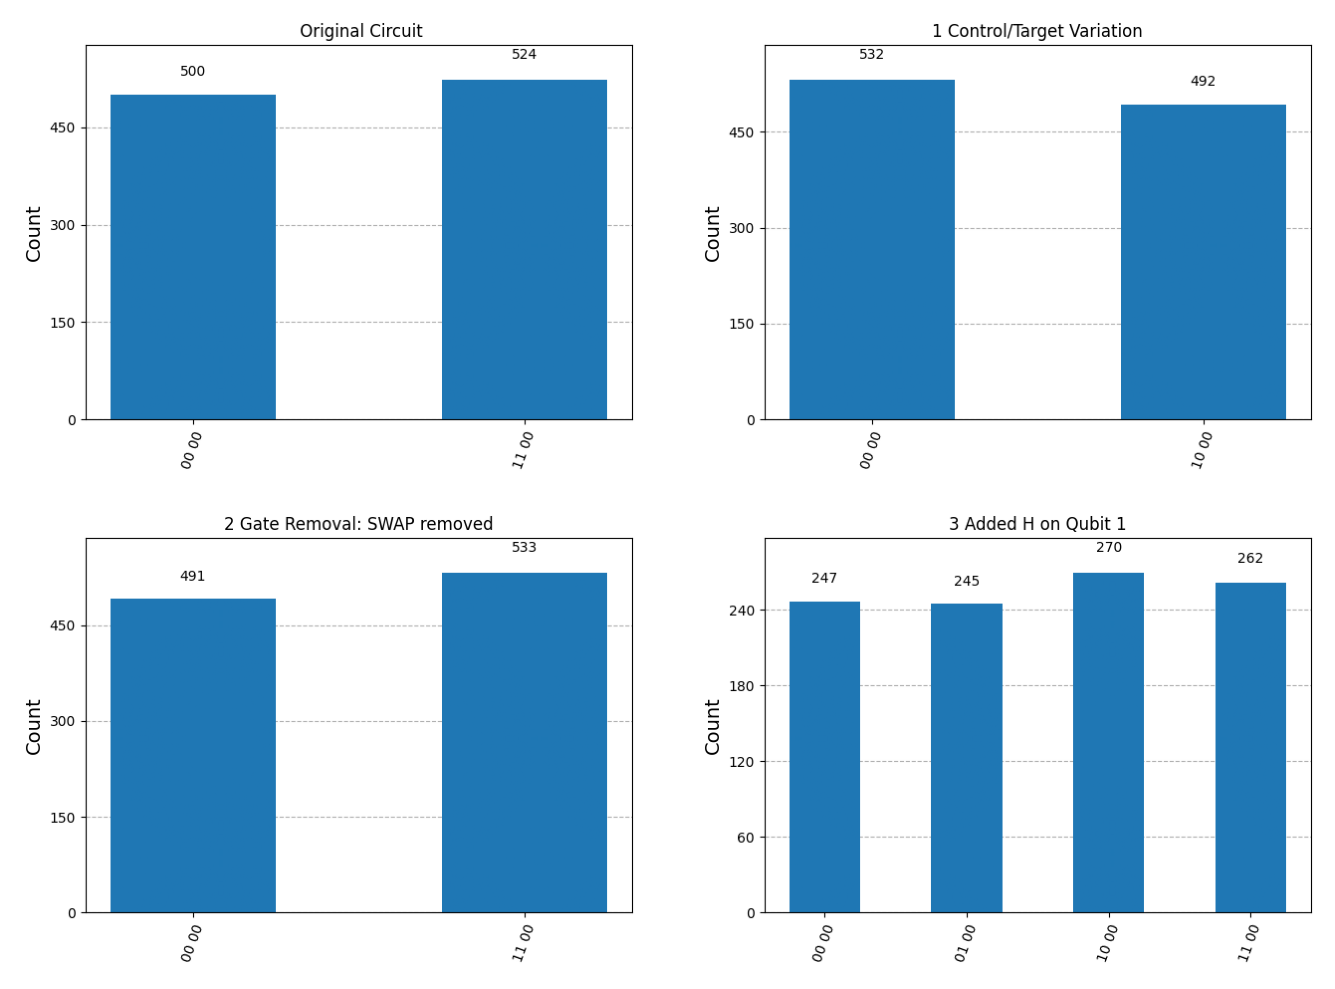

In [17]:
# ============================
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

def plot_in_axis(counts, ax, title):
    # Draw histogram to a temp file
    hist = plot_histogram(counts, title=title)
    hist.savefig("temp.png")
    img = plt.imread("temp.png")
    ax.imshow(img)
    ax.axis('off')

plot_in_axis(counts_original, axs[0, 0], " Original Circuit")
plot_in_axis(counts_variation, axs[0, 1], "1️ Control/Target Variation")
plot_in_axis(counts_no_swap, axs[1, 0], "2️ Gate Removal: SWAP removed")
plot_in_axis(counts_add_h, axs[1, 1], "3️ Added H on Qubit 1")

plt.tight_layout()
plt.show()